# Classify different data sets

### Basic includes

In [1]:
# Using pandas to load the csv file
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras import optimizers
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Classify the Fashion Mnist

---

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)


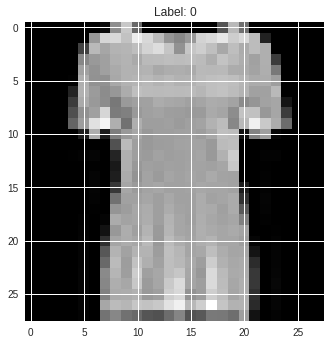

In [2]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
# Normalize the input data set

# flatten arrays
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))

# turn values from 0-255 to 0-1
fashion_train_data = fashion_train_data.astype('float32') / 255 

# same starndadization for the test images
fashion_test_data = fashion_test_data.reshape((10000, 28 * 28)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

# one hot encoding
fashion_train_labels = to_categorical(fashion_train_labels) 
fashion_test_labels = to_categorical(fashion_test_labels)

# create 
validation_data = fashion_train_data[50000:]
validation_labels = fashion_train_labels[50000:]

# select the training set values
X = fashion_train_data[:50000]
y = fashion_train_labels[:50000]

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [4]:
# use validation set

# The keras.models.Sequential class is a wrapper for the neural network model that treats 
# the network as a sequence of layers
network = models.Sequential()

# create network architecture
network.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(64, activation='selu'))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(32, activation='selu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=2)

# network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=20)
fit_network = network.fit(X, y, batch_size=1024, epochs=40, callbacks = [early_stop], validation_data=(validation_data, validation_labels))

evaluated_network = network.evaluate(fashion_test_data, fashion_test_labels)

print("Fit Network: ", fit_network)
print("Evaluated Network: ", evaluated_network)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_3 (Dropout)  

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


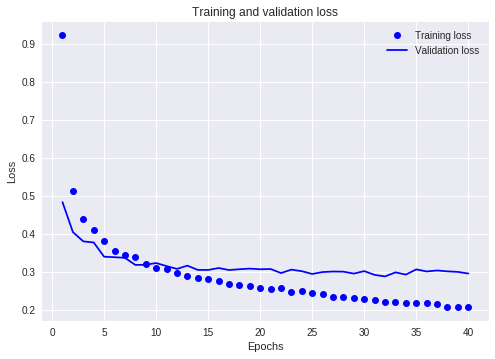

In [5]:
history_dict = fit_network.history
print(history_dict.keys())
# The history values are split in different lists for ease of plotting
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Overfitting if: training loss << validation loss

# Underfitting if: training loss >> validation loss

# Just right if training loss ~ validation loss

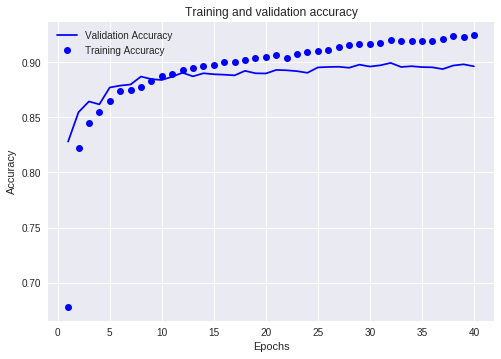

In [6]:
plt.clf()
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [7]:
words_count = 3700
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=words_count)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

2113536/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [8]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

557056/550378 [==============================] - 0s 0us/step
<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <UNKNOWN> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [9]:
# Turning the output into vector mode, each of length 5000
tokenizer = Tokenizer(num_words=words_count)
reuters_train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
reuters_test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')

print(reuters_train_data_token.shape)
print(reuters_test_data_token.shape)

# One-hot encoding the output
reuters_one_hot_train_labels = to_categorical(reuters_train_labels)
reuters_one_hot_test_labels = to_categorical(reuters_test_labels)
print(reuters_one_hot_train_labels.shape)
print(reuters_one_hot_test_labels.shape)

# Creating a validation set with the first 10000 reviews
reuters_validation_data = reuters_train_data_token[:2000]
reuters_validation_labels = reuters_one_hot_train_labels[:2000]

# Creating the input set
X = reuters_train_data_token[2000:]
y = reuters_one_hot_train_labels[2000:]
print(X.shape)
print(y.shape)

(8982, 3700)
(2246, 3700)
(8982, 46)
(2246, 46)
(6982, 3700)
(6982, 46)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [10]:
# use validation set

# The keras.models.Sequential class is a wrapper for the neural network model that treats 
# the network as a sequence of layers
network = models.Sequential()

# create network architecture
network.add(layers.Dense(128, activation='relu', input_shape=(words_count,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))
network.summary()

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=20)

# network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

adagrad = optimizers.Adagrad(lr=0.0074, epsilon=None, decay=0.0065)
network.compile(optimizer=adagrad, loss='categorical_crossentropy', metrics=['accuracy'])

fit_network = network.fit(X, y, batch_size=256, epochs=40,
          callbacks=[early_stop], validation_data=(reuters_validation_data, reuters_validation_labels))
evaluated_network = network.evaluate(reuters_test_data_token, reuters_one_hot_test_labels)

print("Fit Network: ", fit_network)
print("Evaluated Network: ", evaluated_network)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               473728    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 46)                2990      
Total params: 484,974
Trainable params: 484,974
Non-trainable params: 0
_________________________________________________________________
Train on 6982 samples, validate on 2000 samples
Epoch 1/40
6982/6982 [==============================] - 1s 126us/step - loss: 1.6558 - acc: 0.6303 - val_loss: 1.3059 - val_acc: 0.7080
Epoch 2/40
6982/6982 [==============================] - 1s 90us/step - loss: 0.9027 - acc: 0.8041 - val_loss: 1.1034 - val_acc: 0.7475
Epoch 3/40
6982/6982 [==============================] - 1s 90us/step - loss: 0.68

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


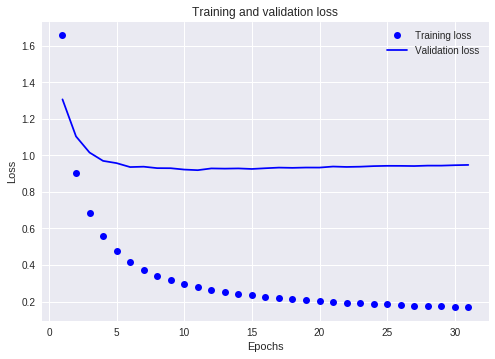

In [11]:
history_dict = fit_network.history
print(history_dict.keys())
# The history values are split in different lists for ease of plotting
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Overfitting if: training loss << validation loss

# Underfitting if: training loss >> validation loss

# Just right if training loss ~ validation loss

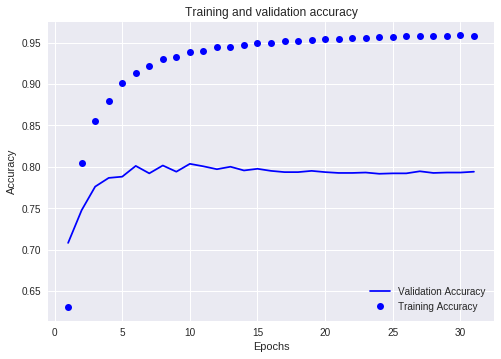

In [12]:
plt.clf()
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [13]:
student_data = pd.read_csv("./student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

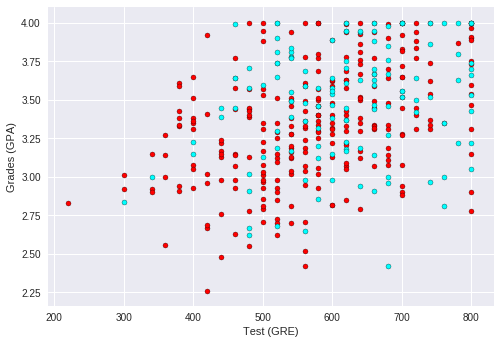

In [14]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

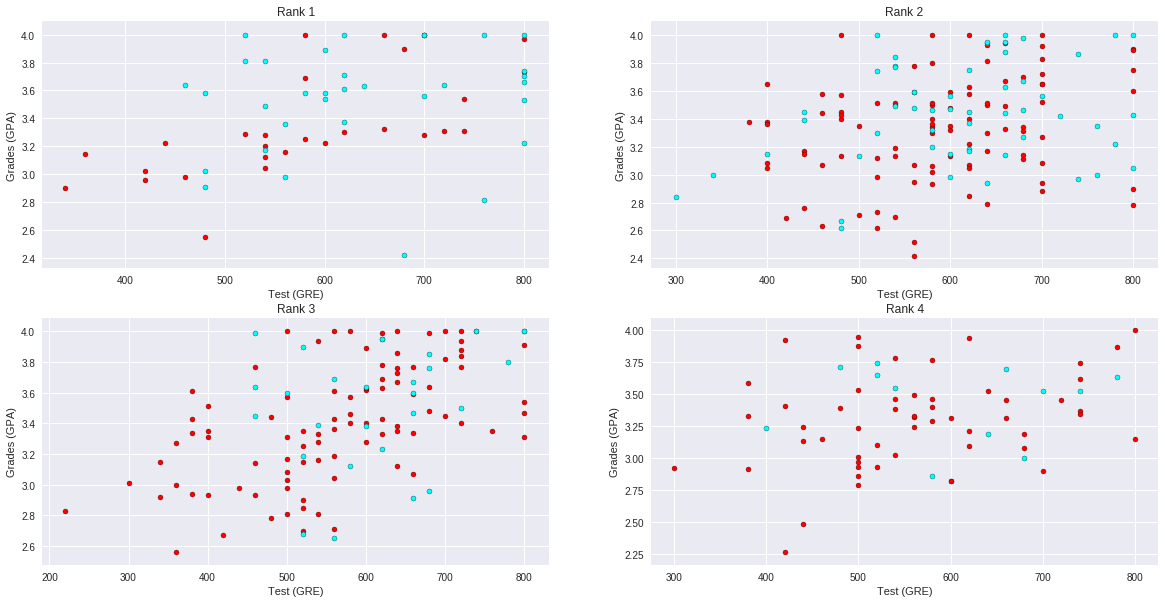

In [15]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
def standardize(vector):
  mean = np.mean(vector)
  sigma = np.std(vector)
  for i in range(0, vector.size):
    vector[i] = (int(vector[i]) - mean)/sigma
    

In [0]:
def cleanData(dataset):
  index = 0
  limit = dataset.shape[0]
  while(index < limit):
    flag = 0
    for j in range(0, dataset.shape[1]):
      if math.isnan(dataset[index][j]):
        flag = 1
    if flag:
      dataset = np.delete(dataset, index, axis=0)
      index = index - 1
      limit = limit - 1
    index = index + 1
  return dataset

In [0]:
# Normalize the input data set
# Creating array
student_data_array = np.array(student_data)
student_data_array[np.isnan(student_data_array)] = 0
np.random.shuffle(student_data_array)

# Get read of observations without data
# student_data_array_clean = cleanData(student_data_array)

# Get GRE and GPA vectors
X_gre = student_data_array[:,1]
X_gpa = student_data_array[:,2]

# Normalize the input data set
standardize(X_gre)
standardize(X_gpa)

# Perform one hot encoding
# Input
rank = student_data_array[:,3]
rank = rank-1
rank_encoded = to_categorical(rank)

# Output
y_admit = student_data_array[:,0]
y_admit_encoded = to_categorical(y_admit)

dataset = np.matrix([X_gre[:], X_gpa[:]]).T
dataset = np.concatenate((dataset, rank_encoded), axis=1)

observations = 200
# Training Set
X = dataset[:observations]
y = y_admit_encoded[:observations]

# Test set
student_test_data = dataset[observations:observations+100]
student_test_labels = y_admit_encoded[observations:observations+100]

# Validation set
student_validation_data = dataset[observations+100:]
student_validation_labels = y_admit_encoded[observations+100:]









#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [56]:
# use validation set

# The keras.models.Sequential class is a wrapper for the neural network model that treats 
# the network as a sequence of layers
network = models.Sequential()

# create network architecture

network.add(layers.Dense(128, activation='relu', input_shape=(6,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(2, activation='softmax'))
network.summary()

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=15)

# network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

adadelta = optimizers.Adadelta(lr=.8, rho=0.28, epsilon=1e-12, decay=0.006)


network.compile(optimizer=adadelta, loss='mean_squared_error', metrics=['accuracy'])

#network.add(layers.UpSampling1D(size=1))


fit_network = network.fit(X, y, batch_size=256, epochs=40,
          callbacks=[early_stop], validation_data=(student_validation_data, student_validation_labels))
evaluated_network = network.evaluate(student_test_data, student_test_labels)

print("Fit Network: ", fit_network)
print("Evaluated Network: ", evaluated_network)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 128)               896       
_________________________________________________________________
dense_134 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_135 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_136 (Dense)            (None, 2)                 66        
Total params: 11,298
Trainable params: 11,298
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 100 samples
Epoch 1/40
200/200 [==============================] - 2s 12ms/step - loss: 0.2484 - acc: 0.5350 - val_loss: 0.2408 - val_acc: 0.6800
Epoch 2/40
200/200 [==============================] - 0s 37us/step - loss: 0.2470 - acc: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


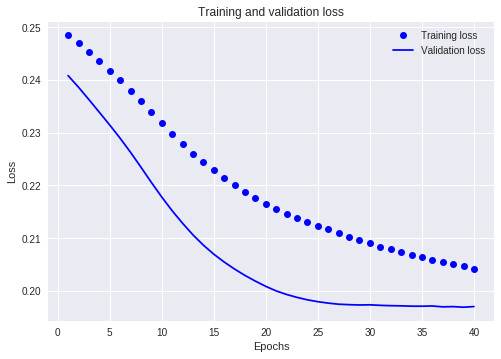

In [57]:
history_dict = fit_network.history
print(history_dict.keys())
# The history values are split in different lists for ease of plotting
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plot of the validation and training loss

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Overfitting if: training loss << validation loss

# Underfitting if: training loss >> validation loss

# Just right if training loss ~ validation loss

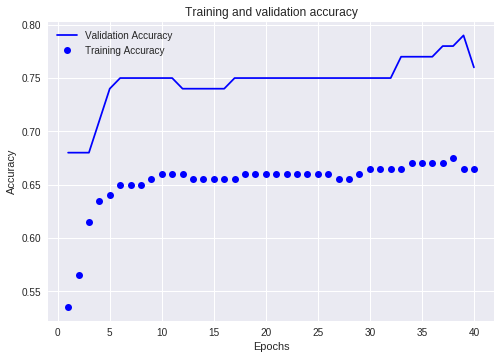

In [58]:
plt.clf()
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

PROBLEM ONE:
  
  For problem one, first, the dataset was downloaded from the fashion MNIST.
  Then, normalization was made and validation, training and testing set were created.
  
  Architecture:
  Afterwards, the main neural network was made. Basically, the structure was configured to   decrease by a factor of 4, this to concentrate inputs aggresively in the first layers, then to decrease the rate of reduction after the third layer, providing a softer activation (SeLu) to smooth out weights activation intensity, just before entering a softmax function (that is less permissive than sigmoid). Also,  dropouts were integrated throughout the layers in order to prevent overfitting. The input shape was the size of the images. Categorical Cross-Entropy was the loss function used because we're dealing with several categories.
  
  Results:
  Excellent results were available for this model, thanks to the large dataset available. Notice that algorithm performance converges as data quantity tends to high numbers. 89% of accuracy and small validation loss indicate good performance for this model in particular (sometimes accuracy and validation loss must be understood differently)
  
  
  

PROBLEM TWO:
The second problem was more challenging since it had considerably less observations thatn the first one. Also, there was the caveat that using the whole set wasn't that useful since a lot of its data was meaningless for the problem at question.

Architecture:
After tokenizing and preprocessing, the neural network was defined. A first layer with 128 neurons and ReLu were made for an input dimension equal to the number of chosen words. A reduction was made to 64 to reduce the impact of a more intense concentration. Then the softmax was applied to the 46 neurons for categorization. In order to improve the model, an early stop was provided to stop training after a value loss constant after 20 epochs. For this problem, Adagrad was used because the algorithm adapts the learning rate to parameters, applying smaller learning rates for parameters that have frequent features and bigger learning rates for parameters that have infrequent features. This is important por the dataset because dealing with language often have many words that have the same features but nonetheless don't actually matter for the analysis of the text, thus prompting for a smaller impact to the model, while there are others that do impact text and have less ocurring features. Parameters were tweaked and categorical cross-entropy was selected. No dropouts where selected because the model hadn't many signs of overfitting.


PROBLEM THREE:
The third problem was the hardest to master because it dealt with an extremely small dataset. The fact that there's a small number of observations imply that weak correlations are probably gonna be made, underfitting the model. It can be seen that the number of features available for modeling is small considering the number of observations.

Architechure:
First of all, the same concentration technique was used in the first layers, those being boosted by ReLu and a softer transition with only a 2 factor reduction. In order to achieve a good performing algorithm, upsampling, feature extrapolation and other techniques. K-fold modelling was also intended in order to find different subsets that can compliment the model and make it stronger, but implementation was a problem. Finally, adadelta was chosen because it is not as aggresive as adagrad and its learning rate doesn't decay monotonically (meaning its more flexible). Since we have even fewer observations and a smaller universe of features, we need a more flexible way to accoplate learning rates without finetuning learning rate to each parameter. Adadelta doesn't accumulate all gradients like Adagrade, making it more efficient, also. Another interesting thing is the fact that instead of using other loss functions, we used mean squared error because of its simple structure. While minimizing the squared distance between prediction and observation, we ensure that we use a really small model that doesn't amplify noise nor throws uncorrelated data through false positives or negatives.
